In [2]:
#import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the data

data = pd.read_csv('C:/Users/HP/Desktop/revision/Machine Learning/classification/projects/creditcard.csv')

In [4]:
#view top 3 rows of data

data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [5]:
#shape of the data

data.shape

(284807, 31)

In [6]:
#check any null values are present

data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#find any duplicates are present

data.duplicated().sum()

1081

In [8]:
#Remove duplicates

cc_data = data.drop_duplicates()

In [9]:
#shape of the data
cc_data.shape

(283726, 31)

In [10]:
#view the relation between variables using correlation

cc_data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


<AxesSubplot:>

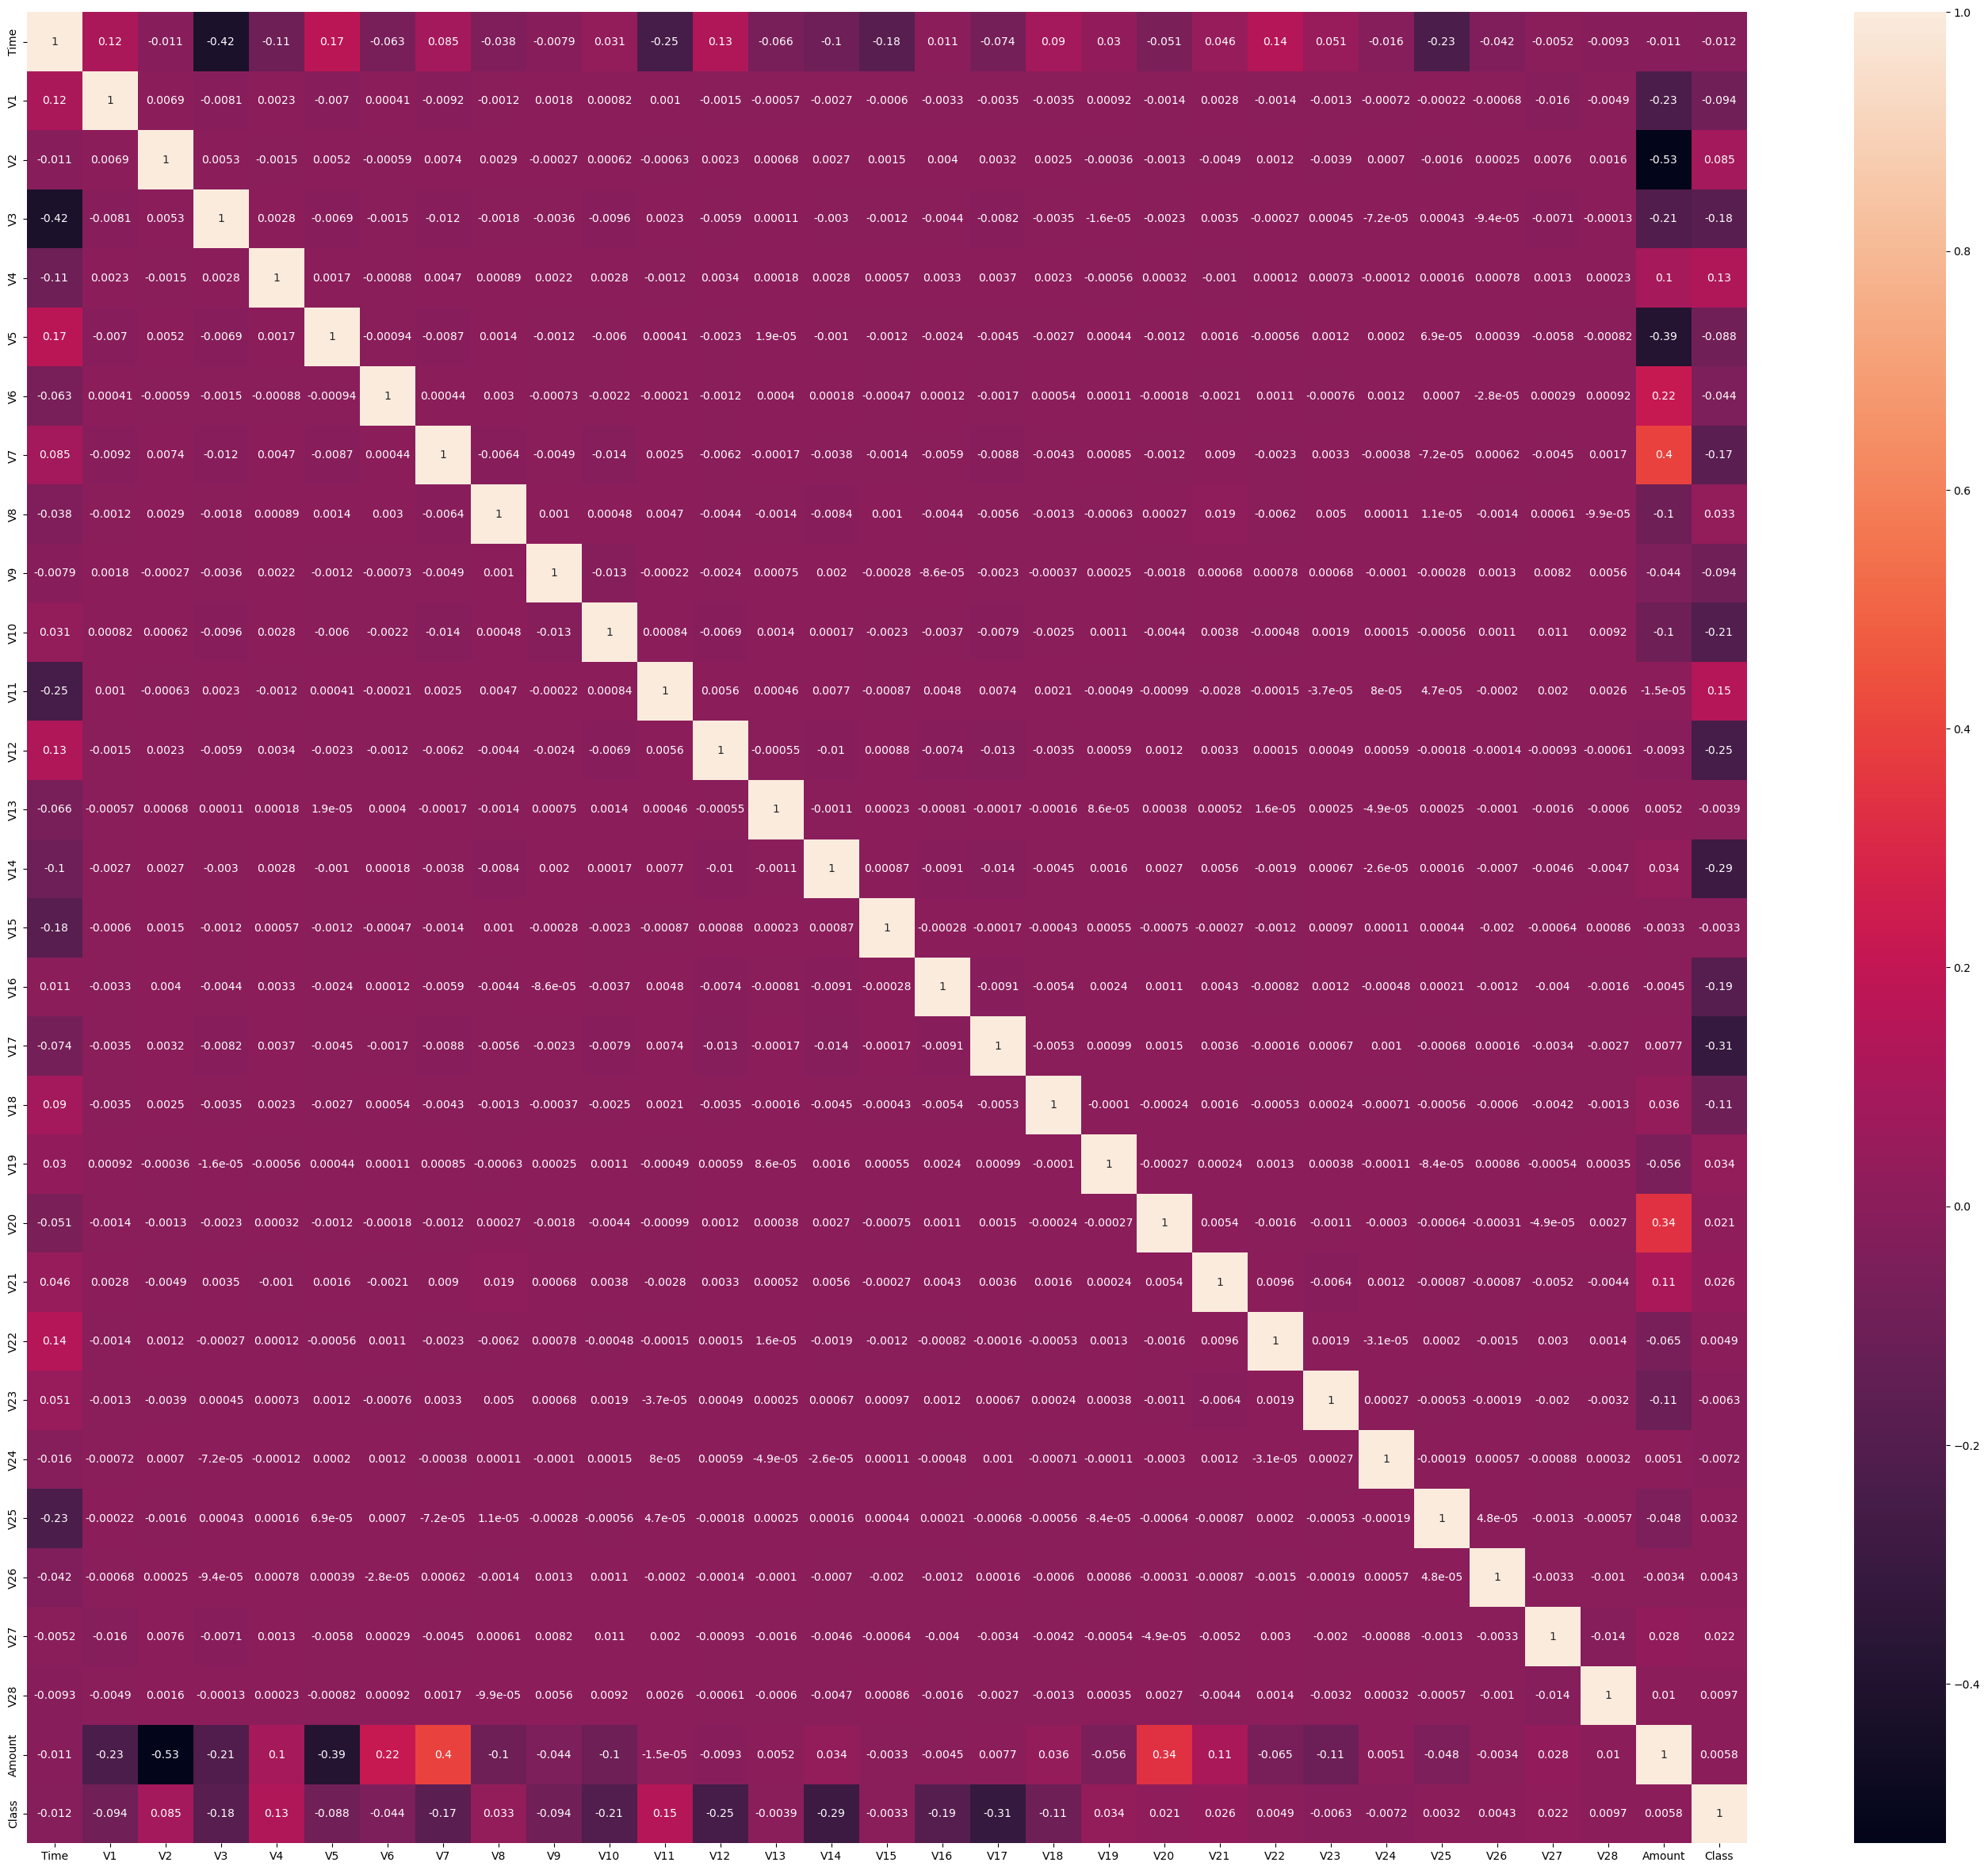

In [28]:
#visualize view of relation between variables

plt.figure(figsize=(35,30))
sns.heatmap(cc_data.corr(), annot=True)

In [12]:
#drop amount and Time columns

credit_data = cc_data.drop(columns=(['Amount', 'Time']), axis=1)

In [13]:
#EDA

credit_data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

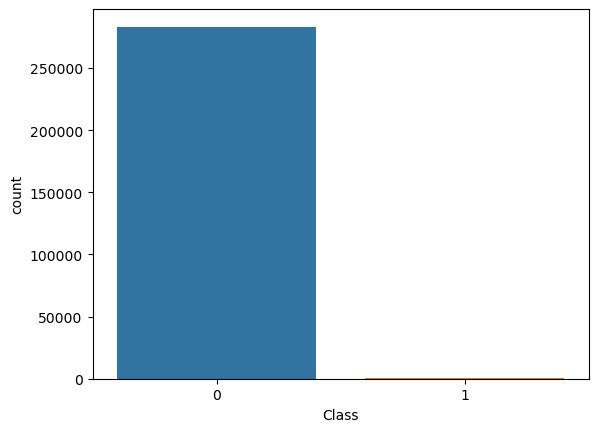

In [14]:
sns.countplot(credit_data['Class'])

# Observations

1.we can observe that data is imbalanced

2.will do under_sampling process to bring it into balanced structure


In [15]:
credit_data.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0


In [16]:
#define x and y values

x = credit_data.iloc[:,:-1].values
y = credit_data['Class'].values


In [17]:
#under_sampling

from imblearn.under_sampling import NearMiss

imn = NearMiss()
x_imn,y_imn = imn.fit_resample(x,y)

In [18]:
from collections import Counter

print('before under_sampling shape is :', Counter(y))
print('After under_sampling shape is :', Counter(y_imn))

before under_sampling shape is : Counter({0: 283253, 1: 473})
After under_sampling shape is : Counter({0: 473, 1: 473})


In [19]:
#split data into train_test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_imn , y_imn, test_size=0.2, random_state=0)

In [20]:
#train the model

from sklearn.linear_model import LogisticRegression

l_model = LogisticRegression()
l_model.fit(x_train,y_train)

#evaluate the model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = l_model.predict(x_test)
score = accuracy_score(y_test, y_pred)

score

0.968421052631579

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

#evaluate the model

y_pred = knn_model.predict(x_test)

score = accuracy_score(y_test, y_pred)
score

0.9421052631578948

In [22]:
from sklearn.tree import DecisionTreeClassifier

d_model = DecisionTreeClassifier()
d_model.fit(x_train, y_train)

y_pred = d_model.predict(x_test)

score = accuracy_score(y_test, y_pred)
score

0.9526315789473684

In [23]:
from sklearn.ensemble import RandomForestClassifier

r_model = RandomForestClassifier()
r_model.fit(x_train, y_train)

y_pred = r_model.predict(x_test)

score = accuracy_score(y_test, y_pred)
score


0.9789473684210527

In [24]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[94,  1],
       [ 3, 92]], dtype=int64)

<AxesSubplot:>

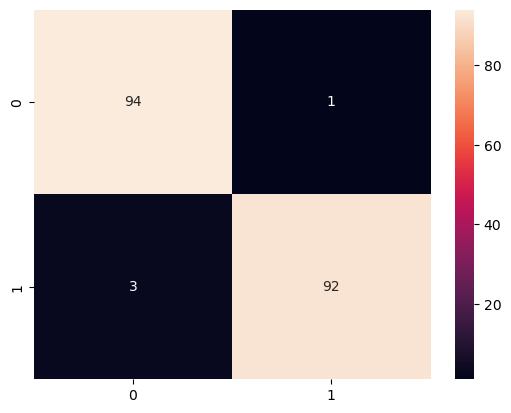

In [25]:
sns.heatmap(cm, annot=True)

In [26]:
cls_rpt = classification_report(y_test, y_pred)
print(cls_rpt)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.99      0.97      0.98        95

    accuracy                           0.98       190
   macro avg       0.98      0.98      0.98       190
weighted avg       0.98      0.98      0.98       190

